In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from predict import mydynamo

In [3]:
X = pd.read_csv('data/export-hs4-pivot.csv')
#X_new => 2019
X_new = X.loc[X['year_at'] == 2019]
X_new = X_new.drop(['year_at'], axis=1)
X_new = X_new.set_index(['exporter'])

#X_old => 2018
X_old = X.loc[X['year_at'] == 2018]
X_old = X_old.drop(['year_at'], axis=1)
X_old = X_old.set_index(['exporter'])

obs = pd.read_csv('countries.csv')
obs = obs.set_index('name')
# obs

var = pd.DataFrame(np.array(X.columns)[2:], columns=['hscode'])
var = var.set_index('hscode')
# var

In [4]:
mydynamo.config()

package,cvxopt,anndata,loompy,trimap,numdifftools,hdbscan,statsmodels,numba,seaborn,colorcet,tqdm,python-igraph,pynndescent,dynamo-release,matplotlib,numpy,pandas,scikit-learn,scipy,setuptools,umap-learn
version,1.2.5.post1,0.7.5,3.0.6,1.4.3.dev1,0.9.39,0.8.26,0.12.1,0.52.0,0.11.1,2.0.2,4.56.0,0.8.3,0.5.1,0.95.2,3.3.3,1.19.3,1.2.0,0.24.0,1.6.0,49.2.1,0.4.6


In [5]:
adata = mydynamo.createAnnotationData(X_new, X_old, obs, var)
adata

AnnData object with n_obs × n_vars = 219 × 1258
    obs: 'id', 'created_at', 'updated_at', 'code', 'iso_code', 'iso_name', 'parentCode', 'parentName'
    layers: 'spliced', 'unspliced'

In [6]:
mydynamo.dynamoProcess(adata)

calculating transition matrix via pearson kernel with sqrt transform.: 100%|█| 
projecting velocity vector to low dimensional embedding...: 100%|█| 219/219 [00


AnnData object with n_obs × n_vars = 219 × 1258
    obs: 'id', 'created_at', 'updated_at', 'code', 'iso_code', 'iso_name', 'parentCode', 'parentName', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'ntr'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'pp', 'PCs', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics', 'neighbors', 'umap_fit', 'grid_velocity_umap'
    obsm: 'X_pca', 'X', 'X_umap', 'velocity_umap'
    layers: 'spliced', 'unspliced', 'X_unspliced', 'X_spliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'
    obsp: 'moments_con', 'connectivities', 'distances', 'pearson_trans

<Figure size 600x400 with 0 Axes>

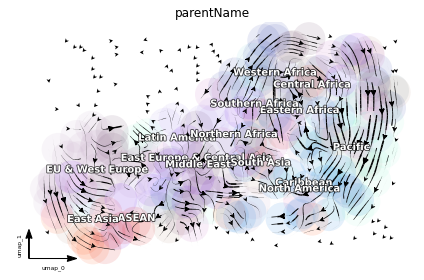

In [7]:
mydynamo.dynamoPlot(adata,'parentName')

<Figure size 1200x800 with 0 Axes>

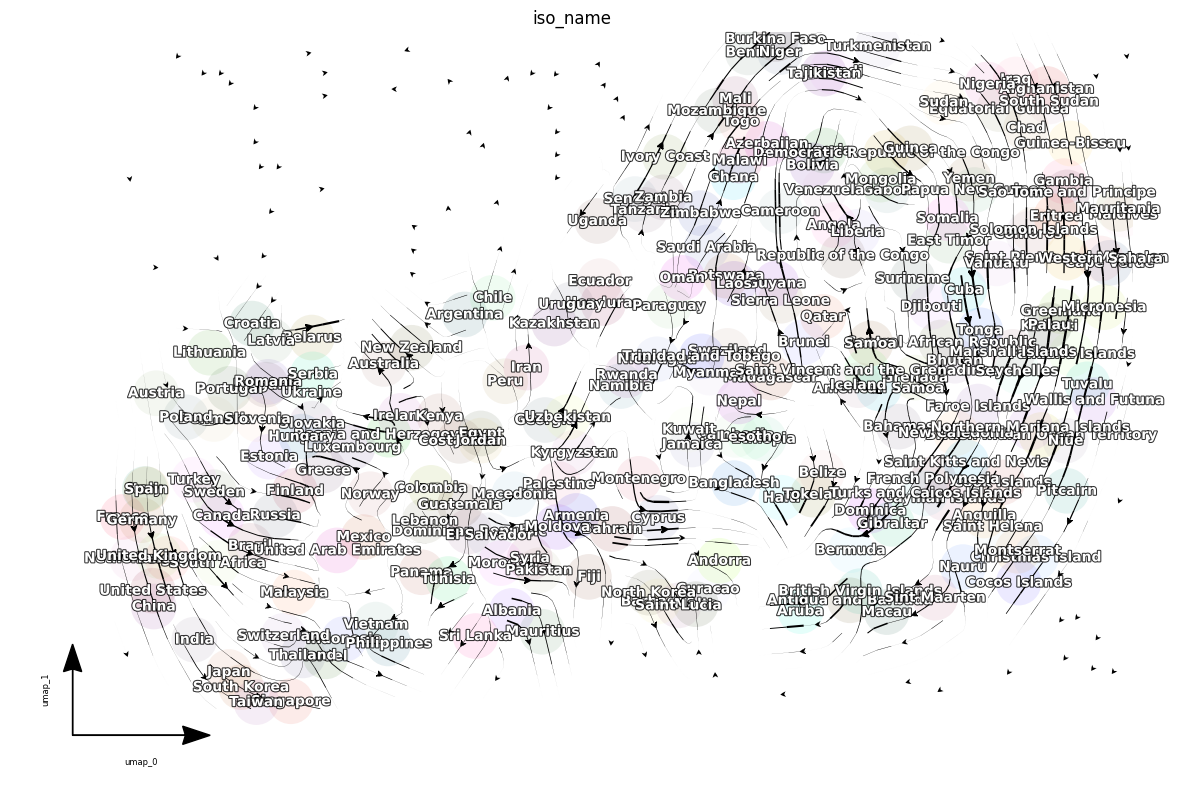

In [8]:
mydynamo.dynamoLargePlot(adata,'iso_name')

In [9]:
adata3 = mydynamo.createVectorField(adata)
adata3

Prepare to Create Vector Field


AnnData expects .obs.index to contain strings, but your first indices are: Index([('latest', 'Afghanistan'), ('latest', 'Albania')], dtype='object'), …
AnnData expects .obs.index to contain strings, but your first indices are: Index([('latest', 'Afghanistan'), ('latest', 'Albania')], dtype='object'), …
calculating transition matrix via pearson kernel with sqrt transform.: 100%|█| 
projecting velocity vector to low dimensional embedding...: 100%|█| 438/438 [00

Create Vector Field ...


AnnData object with n_obs × n_vars = 219 × 1258
    obs: 'id', 'created_at', 'updated_at', 'code', 'iso_code', 'iso_name', 'parentCode', 'parentName', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'ntr'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'pp', 'PCs', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics', 'neighbors', 'umap_fit', 'grid_velocity_umap'
    obsm: 'X_pca', 'X', 'X_umap', 'velocity_umap'
    layers: 'spliced', 'unspliced', 'X_unspliced', 'X_spliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'
    obsp: 'moments_con', 'connectivities', 'distances', 'pearson_trans

<Figure size 600x400 with 0 Axes>

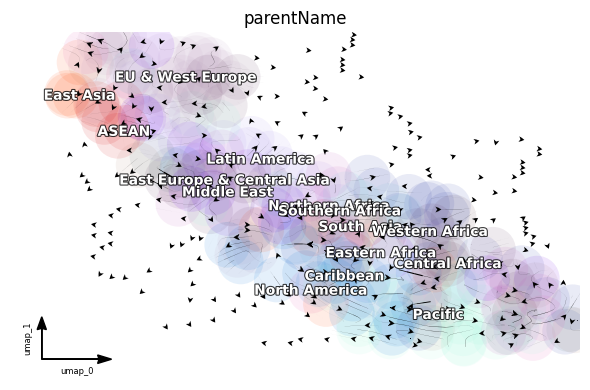

In [10]:
mydynamo.dynamoPlot(adata3,'parentName')

<Figure size 1200x800 with 0 Axes>

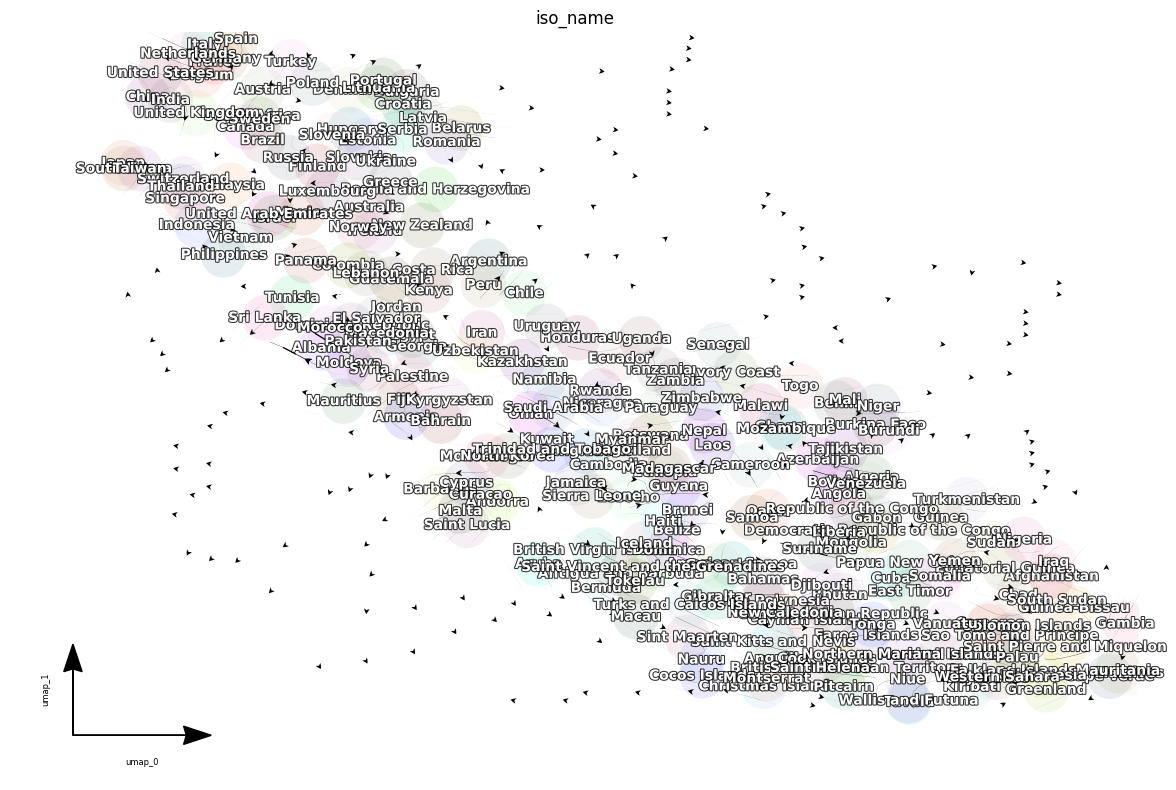

In [11]:
mydynamo.dynamoLargePlot(adata3,'iso_name')

In [12]:
adata4 = mydynamo.knnToVectorField(adata3)
adata4

KNN


AnnData object with n_obs × n_vars = 219 × 1258
    obs: 'id', 'created_at', 'updated_at', 'code', 'iso_code', 'iso_name', 'parentCode', 'parentName', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'ntr'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'pp', 'PCs', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics', 'neighbors', 'umap_fit', 'grid_velocity_umap'
    obsm: 'X_pca', 'X', 'X_umap', 'velocity_umap'
    layers: 'spliced', 'unspliced', 'X_unspliced', 'X_spliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'
    obsp: 'moments_con', 'connectivities', 'distances', 'pearson_trans

<Figure size 600x400 with 0 Axes>

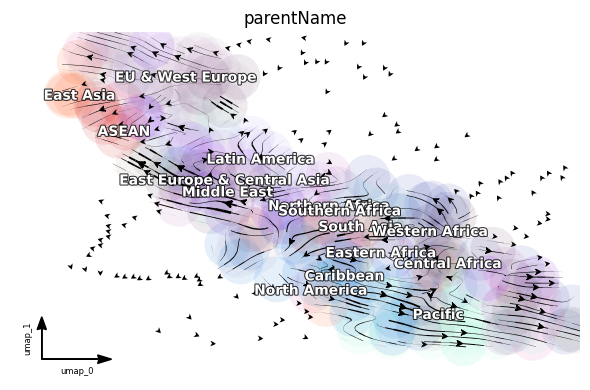

In [13]:
mydynamo.dynamoPlot(adata4,'parentName')

<Figure size 1200x800 with 0 Axes>

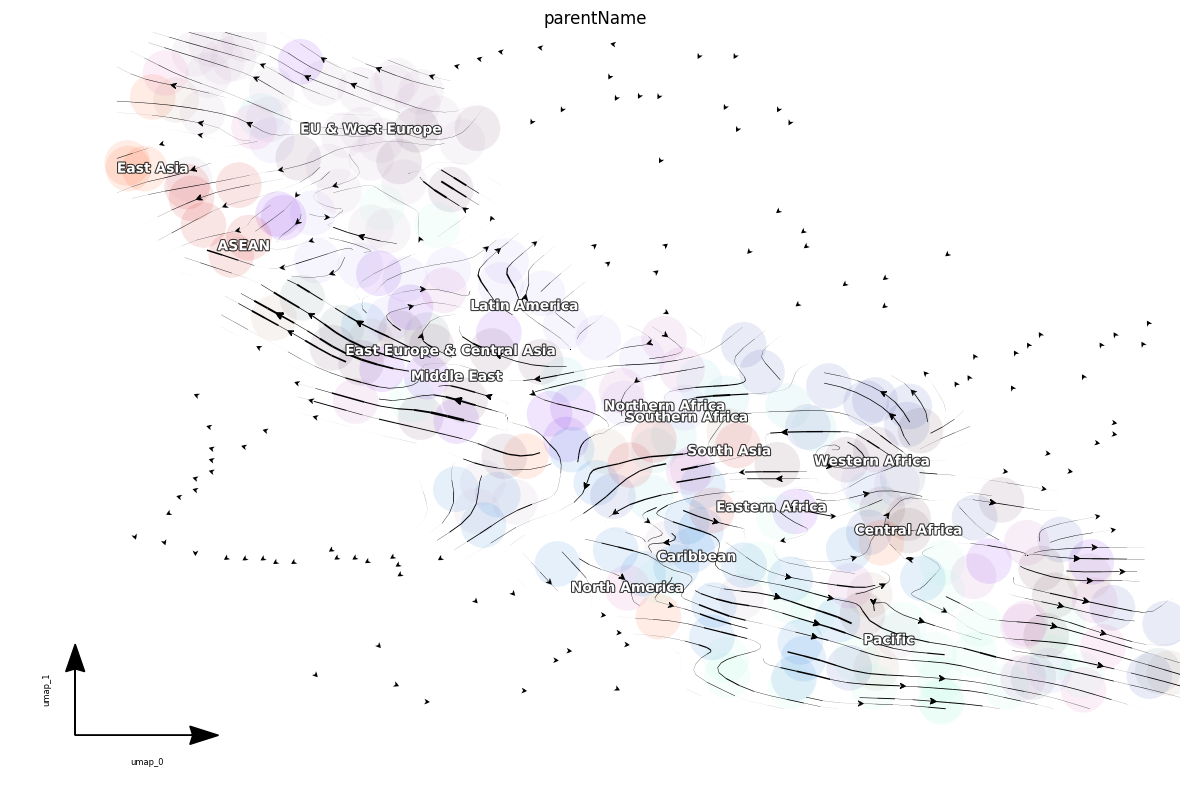

In [14]:
mydynamo.dynamoLargePlot(adata4,'parentName')

<Figure size 1200x800 with 0 Axes>

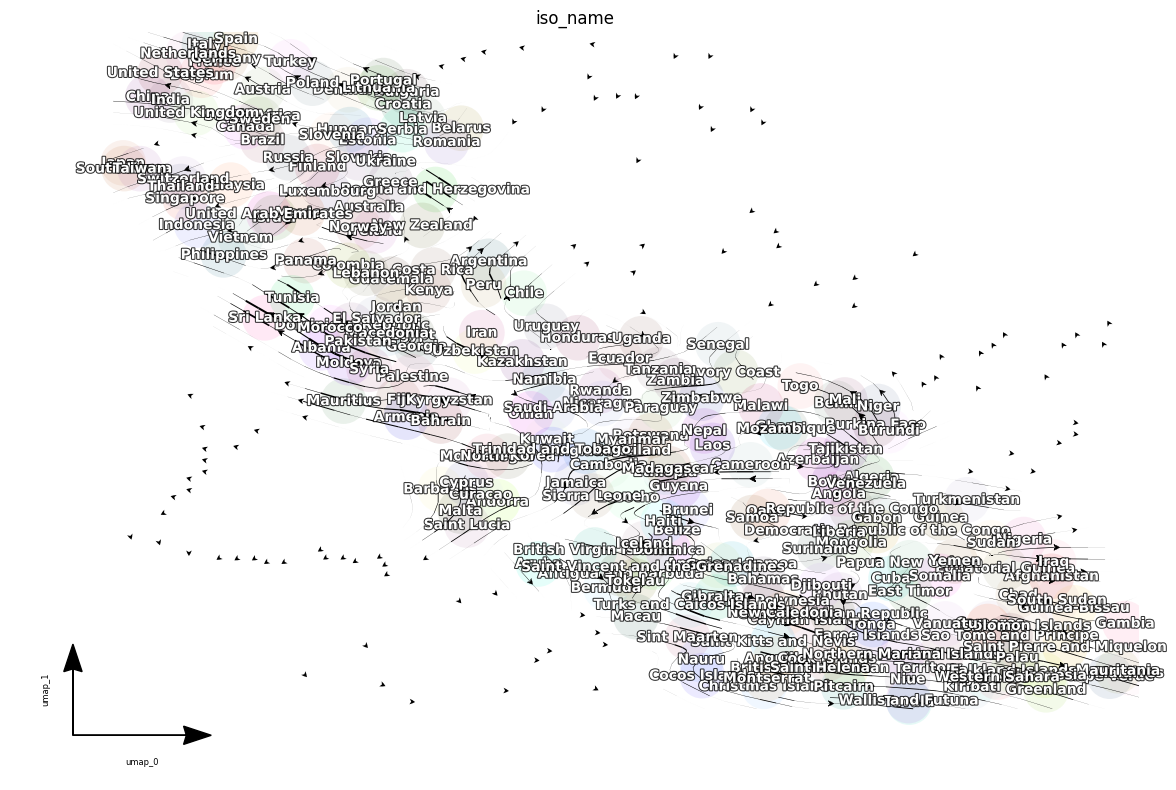

In [15]:
mydynamo.dynamoLargePlot(adata4,'iso_name')

In [17]:
temp_adata = adata4.copy()
temp_adata.obs

,id,created_at,updated_at,code,iso_code,iso_name,parentCode,parentName,nGenes,nCounts,pMito,use_for_pca,unspliced_Size_Factor,initial_unspliced_cell_size,spliced_Size_Factor,initial_spliced_cell_size,Size_Factor,initial_cell_size,ntr
name,,,,,,,,,,,,,,,,,,,
Afghanistan,1,2021-01-06 05:28:44,2021-01-06 05:28:44,4,AF,Afghanistan,13,South Asia,104,863827.0,0.0,True,0.174562,875235.0,0.174635,863827.0,0.174635,863827.0,0.503280
Albania,2,2021-01-06 05:28:45,2021-01-06 05:28:45,8,AL,Albania,6,East Europe & Central Asia,762,2819337.0,0.0,True,0.573575,2875850.0,0.569969,2819337.0,0.569969,2819337.0,0.504961
Algeria,3,2021-01-06 05:28:45,2021-01-06 05:28:45,12,DZ,Algeria,11,Northern Africa,621,36803356.0,0.0,True,8.590024,43069546.0,7.440323,36803374.0,7.440324,36803376.0,0.539226
American Samoa,4,2021-01-06 05:28:45,2021-01-06 05:28:45,16,AS,American Samoa,12,Pacific,169,2473.0,0.0,True,0.002040,10226.0,0.000500,2473.0,0.000500,2473.0,0.805260
Andorra,5,2021-01-06 05:28:45,2021-01-06 05:28:45,20,AD,Andorra,4,EU & West Europe,443,114366.0,0.0,True,0.025812,129420.0,0.023121,114366.0,0.023121,114366.0,0.530875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna Islands,218,2021-01-06 05:29:04,2021-01-06 05:29:04,876,WF,Wallis and Futuna,12,Pacific,47,2043.0,0.0,True,0.000118,593.0,0.000413,2043.0,0.000413,2043.0,0.224962
Western Sahara,219,2021-01-06 05:29:04,2021-01-06 05:29:04,732,EH,Western Sahara,11,Northern Africa,44,3280.0,0.0,True,0.000252,1266.0,0.000663,3280.0,0.000663,3280.0,0.278487
Yemen,220,2021-01-06 05:29:05,2021-01-06 05:29:05,887,YE,Yemen,9,Middle East,277,1569368.0,0.0,True,0.332911,1669181.0,0.317270,1569368.0,0.317270,1569368.0,0.515410


In [20]:
temp_adata.obs['region'] = temp_adata.obs['parentName'] 
temp_adata.obs

,id,created_at,updated_at,code,iso_code,iso_name,parentCode,parentName,nGenes,nCounts,pMito,use_for_pca,unspliced_Size_Factor,initial_unspliced_cell_size,spliced_Size_Factor,initial_spliced_cell_size,Size_Factor,initial_cell_size,ntr,region
name,,,,,,,,,,,,,,,,,,,,
Afghanistan,1,2021-01-06 05:28:44,2021-01-06 05:28:44,4,AF,Afghanistan,13,South Asia,104,863827.0,0.0,True,0.174562,875235.0,0.174635,863827.0,0.174635,863827.0,0.503280,South Asia
Albania,2,2021-01-06 05:28:45,2021-01-06 05:28:45,8,AL,Albania,6,East Europe & Central Asia,762,2819337.0,0.0,True,0.573575,2875850.0,0.569969,2819337.0,0.569969,2819337.0,0.504961,East Europe & Central Asia
Algeria,3,2021-01-06 05:28:45,2021-01-06 05:28:45,12,DZ,Algeria,11,Northern Africa,621,36803356.0,0.0,True,8.590024,43069546.0,7.440323,36803374.0,7.440324,36803376.0,0.539226,Northern Africa
American Samoa,4,2021-01-06 05:28:45,2021-01-06 05:28:45,16,AS,American Samoa,12,Pacific,169,2473.0,0.0,True,0.002040,10226.0,0.000500,2473.0,0.000500,2473.0,0.805260,Pacific
Andorra,5,2021-01-06 05:28:45,2021-01-06 05:28:45,20,AD,Andorra,4,EU & West Europe,443,114366.0,0.0,True,0.025812,129420.0,0.023121,114366.0,0.023121,114366.0,0.530875,EU & West Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna Islands,218,2021-01-06 05:29:04,2021-01-06 05:29:04,876,WF,Wallis and Futuna,12,Pacific,47,2043.0,0.0,True,0.000118,593.0,0.000413,2043.0,0.000413,2043.0,0.224962,Pacific
Western Sahara,219,2021-01-06 05:29:04,2021-01-06 05:29:04,732,EH,Western Sahara,11,Northern Africa,44,3280.0,0.0,True,0.000252,1266.0,0.000663,3280.0,0.000663,3280.0,0.278487,Northern Africa
Yemen,220,2021-01-06 05:29:05,2021-01-06 05:29:05,887,YE,Yemen,9,Middle East,277,1569368.0,0.0,True,0.332911,1669181.0,0.317270,1569368.0,0.317270,1569368.0,0.515410,Middle East


In [36]:
temp_adata.obs.loc[temp_adata.obs['region'] != 'ASEAN']['region'] = ""

temp_adata.obs.loc[temp_adata.obs['region'] != 'ASEAN']['region']


name
Afghanistan                                  South Asia
Albania                      East Europe & Central Asia
Algeria                                 Northern Africa
American Samoa                                  Pacific
Andorra                                EU & West Europe
                                        ...            
Wallis and Futuna Islands                       Pacific
Western Sahara                          Northern Africa
Yemen                                       Middle East
Zambia                                  Southern Africa
Zimbabwe                                Southern Africa
Name: region, Length: 209, dtype: object

In [33]:
temp_adata.obs.loc[temp_adata.obs['region'] != 'ASEAN']['region'] = ""
temp_adata.obs

,id,created_at,updated_at,code,iso_code,iso_name,parentCode,parentName,nGenes,nCounts,pMito,use_for_pca,unspliced_Size_Factor,initial_unspliced_cell_size,spliced_Size_Factor,initial_spliced_cell_size,Size_Factor,initial_cell_size,ntr,region
name,,,,,,,,,,,,,,,,,,,,
Afghanistan,1,2021-01-06 05:28:44,2021-01-06 05:28:44,4,AF,Afghanistan,13,South Asia,104,863827.0,0.0,True,0.174562,875235.0,0.174635,863827.0,0.174635,863827.0,0.503280,South Asia
Albania,2,2021-01-06 05:28:45,2021-01-06 05:28:45,8,AL,Albania,6,East Europe & Central Asia,762,2819337.0,0.0,True,0.573575,2875850.0,0.569969,2819337.0,0.569969,2819337.0,0.504961,East Europe & Central Asia
Algeria,3,2021-01-06 05:28:45,2021-01-06 05:28:45,12,DZ,Algeria,11,Northern Africa,621,36803356.0,0.0,True,8.590024,43069546.0,7.440323,36803374.0,7.440324,36803376.0,0.539226,Northern Africa
American Samoa,4,2021-01-06 05:28:45,2021-01-06 05:28:45,16,AS,American Samoa,12,Pacific,169,2473.0,0.0,True,0.002040,10226.0,0.000500,2473.0,0.000500,2473.0,0.805260,Pacific
Andorra,5,2021-01-06 05:28:45,2021-01-06 05:28:45,20,AD,Andorra,4,EU & West Europe,443,114366.0,0.0,True,0.025812,129420.0,0.023121,114366.0,0.023121,114366.0,0.530875,EU & West Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna Islands,218,2021-01-06 05:29:04,2021-01-06 05:29:04,876,WF,Wallis and Futuna,12,Pacific,47,2043.0,0.0,True,0.000118,593.0,0.000413,2043.0,0.000413,2043.0,0.224962,Pacific
Western Sahara,219,2021-01-06 05:29:04,2021-01-06 05:29:04,732,EH,Western Sahara,11,Northern Africa,44,3280.0,0.0,True,0.000252,1266.0,0.000663,3280.0,0.000663,3280.0,0.278487,Northern Africa
Yemen,220,2021-01-06 05:29:05,2021-01-06 05:29:05,887,YE,Yemen,9,Middle East,277,1569368.0,0.0,True,0.332911,1669181.0,0.317270,1569368.0,0.317270,1569368.0,0.515410,Middle East
